# CS412 - Machine Learning - 2020
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision tree approache
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. You must use a 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the official test data (10,000 samples) only for testing.**

## Task 
Build a decision tree classifier with the scikit library function calls to classify digits in the MNIST dataset.

## Software: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## Submission: 
Fill this notebook and submit this document with a link to #your Colab notebook 
(make sure to include the link obtained from the #share link on top right)


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

# Read data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Each image is reshaped into a vector of size 784 from 28*28
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels))

train_dataframe = pd.DataFrame(X_train)
train_dataframe.columns = ["pixel" +str(i) for i in range(1, X_train[1].size+1)]
train_dataframe['label'] = y_train

11493376/11490434 [==============================] - 0s 0us/step


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system, but for this homework this is not really necessary as  the features are homogeneous (pixels) and all necessary.


In [ ]:
# print shape
print('Data Dimensionality: ', train_dataframe.shape)

#Name of the columns
print('\nAttribute names:\n ', train_dataframe.columns)

# print first 5 rows in your dataset
print('\nHead of Data:')
train_dataframe.head()

Data Dimensionality:  (60000, 785)

Attribute names:
  Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'label'],
      dtype='object', length=785)

Head of Data:


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the training data
shuffled_df = shuffle(train_dataframe)
label = shuffled_df['label']
print('Head of Shuffled Data: \n', shuffled_df.head())
shuffled_df = shuffled_df.drop(columns=['label'])

# Split 80-20
X_train, X_valid, y_train, y_valid = train_test_split(shuffled_df, label, test_size=0.2, random_state=42)
print("\nFull train data shape:", X_train.shape, "Full train label shape:", y_train.shape, "Validation data shape:", X_valid.shape, "Validation label shape:", y_valid.shape)

Head of Shuffled Data: 
        pixel1  pixel2  pixel3  pixel4  ...  pixel782  pixel783  pixel784  label
22360       0       0       0       0  ...         0         0         0      6
7210        0       0       0       0  ...         0         0         0      7
19207       0       0       0       0  ...         0         0         0      5
40607       0       0       0       0  ...         0         0         0      2
47306       0       0       0       0  ...         0         0         0      2

[5 rows x 785 columns]

Full train data shape: (48000, 784) Full train label shape: (48000,) Validation data shape: (12000, 784) Validation label shape: (12000,)


In [ ]:
type(y_train)

pandas.core.series.Series

##5) Train a decision tree classifier on development/train data and do model selection using the validation data

* Train 3 decision tree classifiers with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [default = 2, 5, 10]. 
* Test the 3 models on validation set and choose the best one.
* Plot the train and validation set errors for those 3 settings - on one plot. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# Create Decision Tree classifer object
time1 = time.perf_counter()
clf1 = DecisionTreeClassifier(min_samples_split=2)
time1_2 = time.perf_counter()
print("Clf1 is generated in: " , time1_2 - time1)

time2 = time.perf_counter()
clf2 = DecisionTreeClassifier(min_samples_split=5)
time2_2 = time.perf_counter()
print("Clf2 is generated in: " , time2_2 - time2)

time3 = time.perf_counter()
clf3 = DecisionTreeClassifier(min_samples_split=10)
time3_2 = time.perf_counter()
print("Clf3 is generated in: " , time3_2 - time3)

time_arr = [time1_2 - time1, time2_2 - time2, time3_2 - time3]
print("Fastest algorithm is ", time_arr.index(min(time_arr)) +1, "th and it runs in ", min(time_arr))

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1_t = clf1.predict(X_train)
y_pred2_t = clf2.predict(X_train)
y_pred3_t = clf3.predict(X_train)

y_pred1_v = clf1.predict(X_valid)
y_pred2_v = clf2.predict(X_valid)
y_pred3_v = clf3.predict(X_valid)

# Evaluate on validation set
print("\nTraining Accuracy1: %.3f" %accuracy_score(y_train, y_pred1_t))
print("Training Accuracy2: %.3f" %accuracy_score(y_train, y_pred2_t))
print("Training Accuracy3: %.3f" %accuracy_score(y_train, y_pred3_t))

print("\nValidation Accuracy1: %.4f" %accuracy_score(y_valid, y_pred1_v))
print("Validation Accuracy2: %.4f" %accuracy_score(y_valid, y_pred2_v))
print("Validation Accuracy3: %.4f" %accuracy_score(y_valid, y_pred3_v))

Clf1 is generated in:  9.526299982098863e-05
Clf2 is generated in:  8.084900036919862e-05
Clf3 is generated in:  4.9481000132800546e-05
Fastest algorithm is  3 th and it runs in  4.9481000132800546e-05

Training Accuracy1: 1.000
Training Accuracy2: 0.982
Training Accuracy3: 0.965

Validation Accuracy1: 0.8667
Validation Accuracy2: 0.8664
Validation Accuracy3: 0.8620


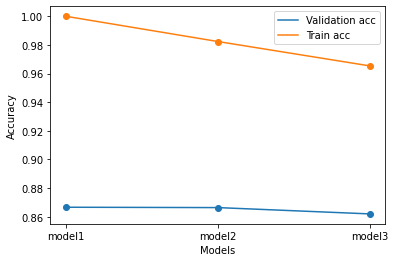

In [ ]:
#Plot the errors
x_axis = ['model1', 'model2', 'model3']
val_acc = [accuracy_score(y_valid, y_pred1_v), accuracy_score(y_valid, y_pred2_v), accuracy_score(y_valid, y_pred3_v)]
train_acc = [accuracy_score(y_train, y_pred1_t), accuracy_score(y_train, y_pred2_t), accuracy_score(y_train, y_pred3_t)]
plt.scatter(x_axis, val_acc)
plt.scatter(x_axis, train_acc)
plt.plot(x_axis, val_acc, label = "Validation acc")
plt.plot(x_axis, train_acc, label = "Train acc")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7) Test your CHOSEN classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best chosen SINGLE model out of the models that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [ ]:
#Load test data
#I had loaded it while loading the training data (1st step)
X_test = X_test.reshape((X_test.shape[0], num_pixels)) #num_pixels is calculated above as num_pixels = X_train.shape[1] * X_train.shape[2]
print('Data Dimensionality: ', X_test.shape)

test_dataframe = pd.DataFrame(X_test)
test_dataframe.columns = ["pixel" +str(i) for i in range(1, X_test[1].size+1)]

#Name of the columns
print('\nAttribute names: ', test_dataframe.columns)

# print first 5 rows in your dataset
print('\nHead of Test Data: \n', test_dataframe.head())


# test prediction using a decision tree with all default parameters and ..... min-split value 
y_pred_test = clf1.predict(test_dataframe)


# Report your accuracy
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))

Data Dimensionality:  (10000, 784)

Attribute names:  Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

Head of Test Data: 
    pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]

Test Accuracy: 0.8759


##8) Notebook & Report 




  This project aims to conclude with the best model selection from decision tree classifiers of different split samples by using MNIST dataset.


`In terms of preprocessing:` After loading MNIST dataset, I acquired a training dataset of type numpy array with 3 dimensions (60000, 28, 28). In order to be uploading this to a dataframe, I reshaped the array and converted it to 2d form (60000, 784) because dataframes accept only 2d data. 

After shuffling the dataframe in order to ensure that each data point creates an independent change on the model without being biased by the same points before them, I splitted the MNIST training dataset (60000) as %80 training(48000) and %20 validation (12000) using the function train_test_split. We were given the test dataset (10000) at the loading step from MNIST, so I have not changed anything regarding the test set/size. 

I have created 3 different decision tree classifiers of sample split 2, 5 and 10. After training the classifiers with training data by using fit function, I made predictions based on training and validation sets in order to choose the model with highest validation accuracy. I have used accuracy to choose the best model since we are working on a classification tree problem. 
Among the 3 models, I have choosen model1 since it had the highest validation accuracy with 0.8667.

Validation Accuracy1: 0.8667, min_samples_split=2

Validation Accuracy2: 0.8664, min_samples_split=5

Validation Accuracy3: 0.8620, min_samples_split=10

Using the past experience gained on prediction of validation data, I have tested the model with test data and obtained the best results with the 2 split classifier, giving classification accuracy of 87.59% on test data.

As I have calculated the generation times of classifiers with different min_samples_split, I have found that the fastest one changes although it is mostly the one with 10 splits:

Clf1 is generated in:  9.526299982098863e-05

Clf2 is generated in:  8.084900036919862e-05

Clf3 is generated in:  4.9481000132800546e-05

Fastest algorithm is  3 th and it runs in  4.9481000132800546e-05
